In [0]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from datetime import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
%matplotlib inline

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/AXA/insurance_claims.csv'

In [0]:
axa = pd.read_csv(file_path)

In [0]:
axa.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [0]:
axa.shape

(1000, 39)

In [0]:
axa.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [0]:
axa['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


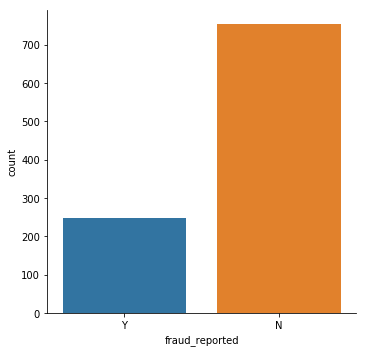

In [0]:
sns.factorplot('fraud_reported',data=axa,kind="count")

In [0]:
axa[axa=="?"].any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [0]:
axa['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [0]:
axa['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [0]:
axa['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

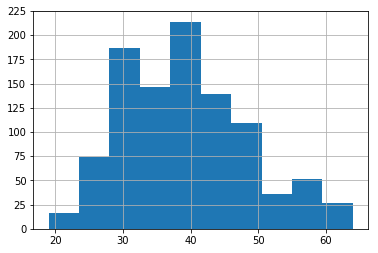

In [0]:
axa['age'].hist(bins = 10)

In [0]:
axa['age'].mean()

38.948

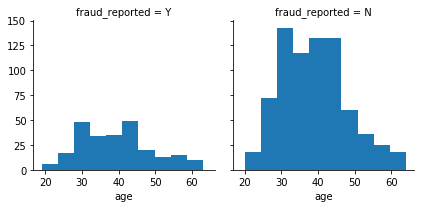

In [0]:
g = sns.FacetGrid(axa, col='fraud_reported')
g.map(plt.hist, 'age', bins=10)

In [0]:
axa.groupby(['collision_type','fraud_reported']).size()

collision_type   fraud_reported
?                N                 162
                 Y                  16
Front Collision  N                 184
                 Y                  70
Rear Collision   N                 201
                 Y                  91
Side Collision   N                 206
                 Y                  70
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


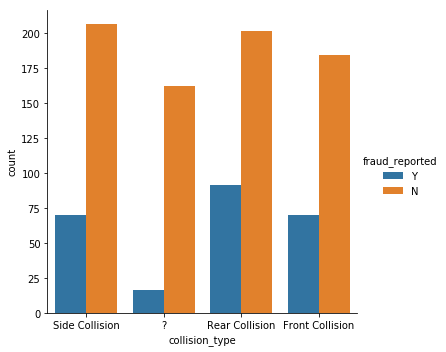

In [0]:
sns.factorplot('collision_type',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


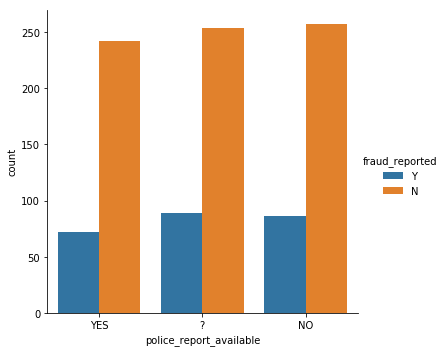

In [0]:
sns.factorplot('police_report_available',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


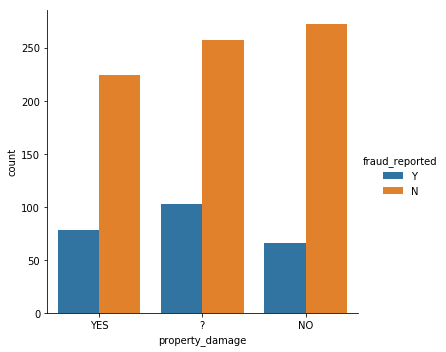

In [0]:
sns.factorplot('property_damage',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


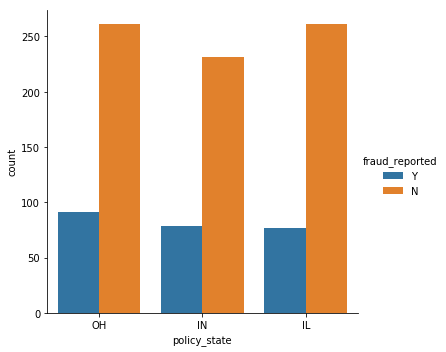

In [0]:
sns.factorplot('policy_state',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


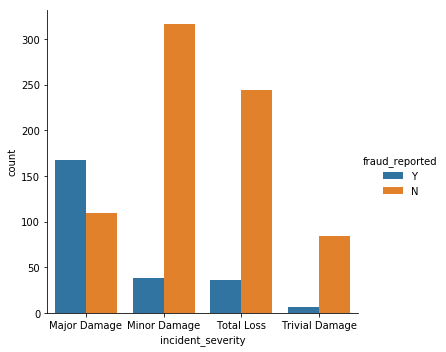

In [0]:
sns.factorplot('incident_severity',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


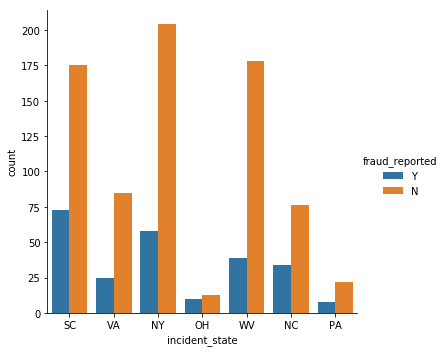

In [0]:
sns.factorplot('incident_state',data=axa,kind='count',hue='fraud_reported')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


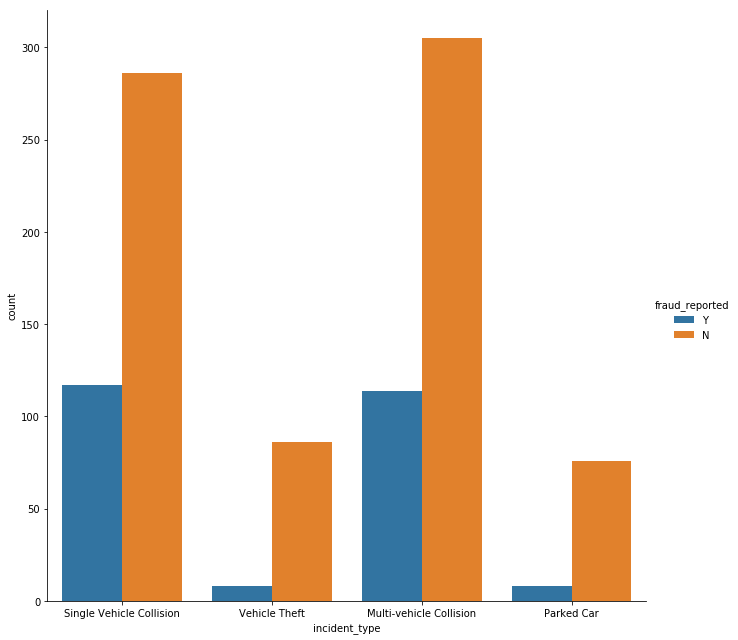

In [0]:
sns.factorplot('incident_type',data=axa,kind='count',hue='fraud_reported',size =9)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


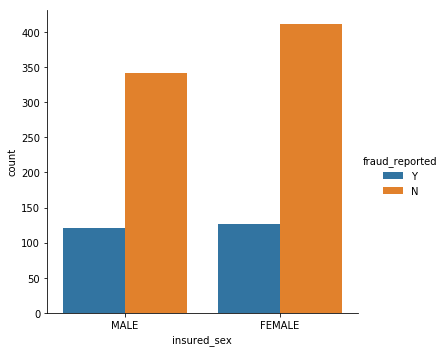

In [0]:
sns.factorplot('insured_sex',data=axa,kind='count',hue='fraud_reported')

In [0]:
axa.describe(include=[np.object])

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,28-04-1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,3659 Oak Lane,?,NO,Dodge,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [0]:
pd.crosstab(index=[axa['incident_date']], columns=[axa['fraud_reported']])

fraud_reported,N,Y
incident_date,,
01-01-2015,14,5
01-02-2015,12,6
01-03-2015,8,4
02-01-2015,7,4
02-02-2015,19,9
03-01-2015,14,4
03-02-2015,11,2
04-01-2015,11,1
04-02-2015,16,8


In [0]:
axa['incident_date1'] =  pd.to_datetime(axa['incident_date'], format='%d-%m-%Y')

In [0]:
import datetime
axa['month'] = pd.DatetimeIndex(axa['incident_date1']).month

In [0]:
axa['month'].value_counts()

1    516
2    472
3     12
Name: month, dtype: int64

In [0]:
axa['day'] = pd.DatetimeIndex(axa['incident_date']).day

In [0]:
axa['day'].value_counts()

1     200
2     199
24     41
17     41
21     38
13     37
14     37
22     34
19     33
28     33
18     33
16     32
20     32
23     32
15     31
25     28
26     28
27     27
30     21
31     20
3      12
29     11
Name: day, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


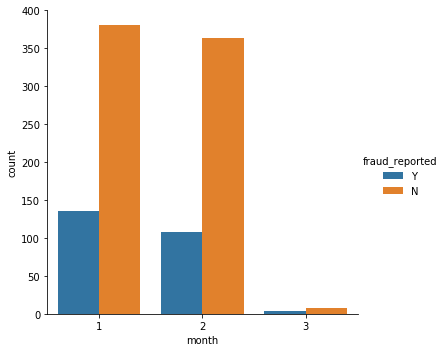

In [0]:
sns.factorplot('month',data=axa,kind='count',hue='fraud_reported')

In [0]:
axa['policy_bind_date'].value_counts()

28-04-1992    3
01-01-2006    3
05-08-1992    3
11-11-1998    2
06-05-2007    2
03-02-1997    2
15-11-1997    2
04-05-2000    2
25-05-1990    2
20-07-1991    2
21-09-1996    2
25-12-2013    2
16-07-2002    2
20-09-1990    2
05-01-1992    2
08-11-2009    2
21-12-2002    2
28-01-2010    2
14-04-1992    2
24-06-1990    2
29-01-1998    2
25-09-2001    2
14-07-1997    2
07-07-1996    2
22-08-1991    2
04-06-2000    2
29-09-1999    2
27-07-2014    2
09-03-2003    2
14-12-1991    2
             ..
02-10-1997    1
24-08-2000    1
18-10-1995    1
03-11-2009    1
31-01-2011    1
28-09-2007    1
11-06-2014    1
09-04-2001    1
19-04-2007    1
29-11-2004    1
25-10-2007    1
21-04-2006    1
06-03-2005    1
06-03-2003    1
04-01-2009    1
29-03-2005    1
19-12-1997    1
28-04-2007    1
29-12-2010    1
11-08-2007    1
27-04-2009    1
03-07-1992    1
29-08-2010    1
27-11-1992    1
07-04-1998    1
10-02-2002    1
25-05-2011    1
03-09-2013    1
27-10-2013    1
17-08-2011    1
Name: policy_bind_date, 

In [0]:
axa['policy_bind_date1'] =  pd.to_datetime(axa['policy_bind_date'], format='%d-%m-%Y')

axa['year'] = pd.DatetimeIndex(axa['policy_bind_date1']).year

axa['year'].value_counts()

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


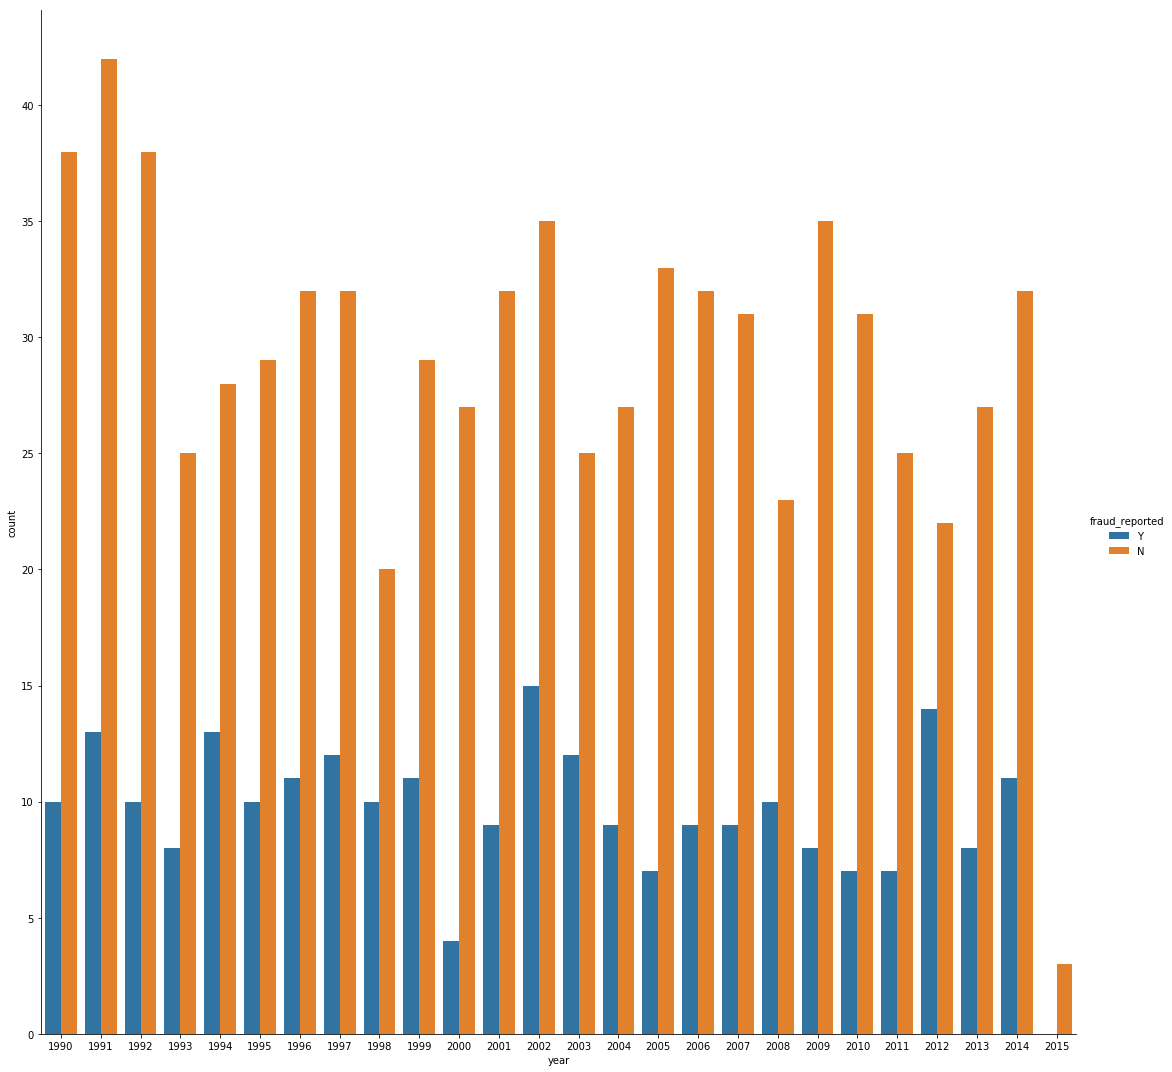

In [0]:
sns.factorplot('year',data=axa,kind='count',hue='fraud_reported',size=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


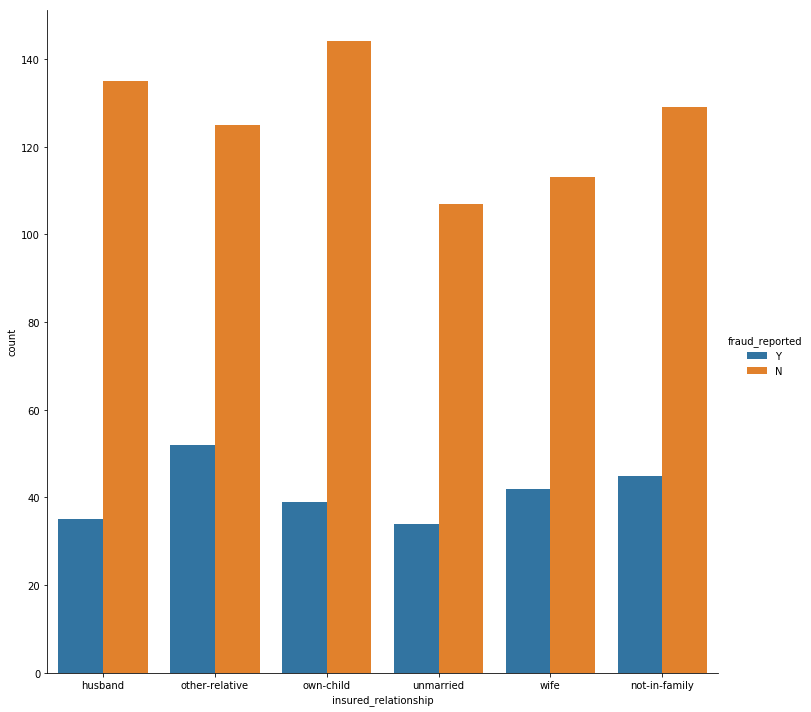

In [0]:
sns.factorplot('insured_relationship',data=axa,kind='count',hue='fraud_reported',size=10)

In [0]:
axa.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_date1,month,day,policy_bind_date1,year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2015-01-25,1,25,2014-10-17,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2015-01-21,1,21,2006-06-27,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2015-02-22,2,22,2000-09-06,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,2015-01-10,1,1,1990-05-25,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2015-02-17,2,17,2014-06-06,2014


In [0]:
axa['Age'] = axa['age'].astype(int)
axa.loc[ axa['age'] <= 11, 'age'] = 0
axa.loc[(axa['age'] > 11) & (axa['age'] <= 18), 'age'] = 1
axa.loc[(axa['age'] > 18) & (axa['age'] <= 22), 'age'] = 2
axa.loc[(axa['age'] > 22) & (axa['age'] <= 27), 'age'] = 3
axa.loc[(axa['age'] > 27) & (axa['age'] <= 33), 'age'] = 4
axa.loc[(axa['age'] > 33) & (axa['age'] <= 40), 'age'] = 5
axa.loc[(axa['age'] > 40) & (axa['age'] <= 66), 'age'] = 6
axa.loc[ axa['age'] > 66, 'age'] = 6

In [0]:
axa['Age'].value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: Age, dtype: int64

In [0]:
axa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

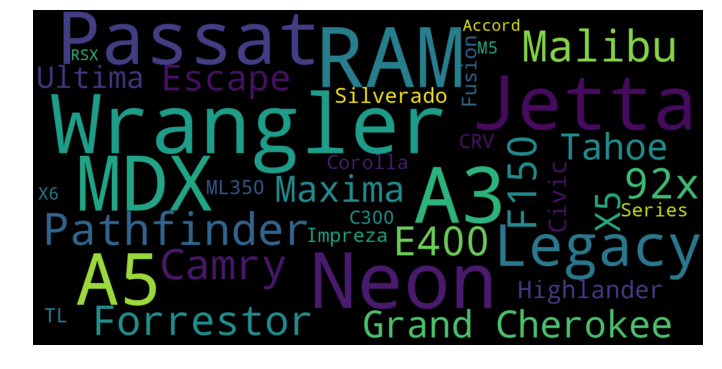

In [0]:
from wordcloud import WordCloud

text = axa['auto_model'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

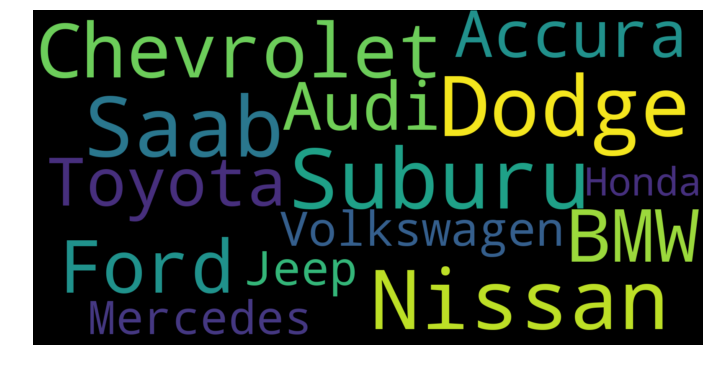

In [0]:
from wordcloud import WordCloud

text = axa['auto_make'].to_string()

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
axa['auto_make'].value_counts()

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


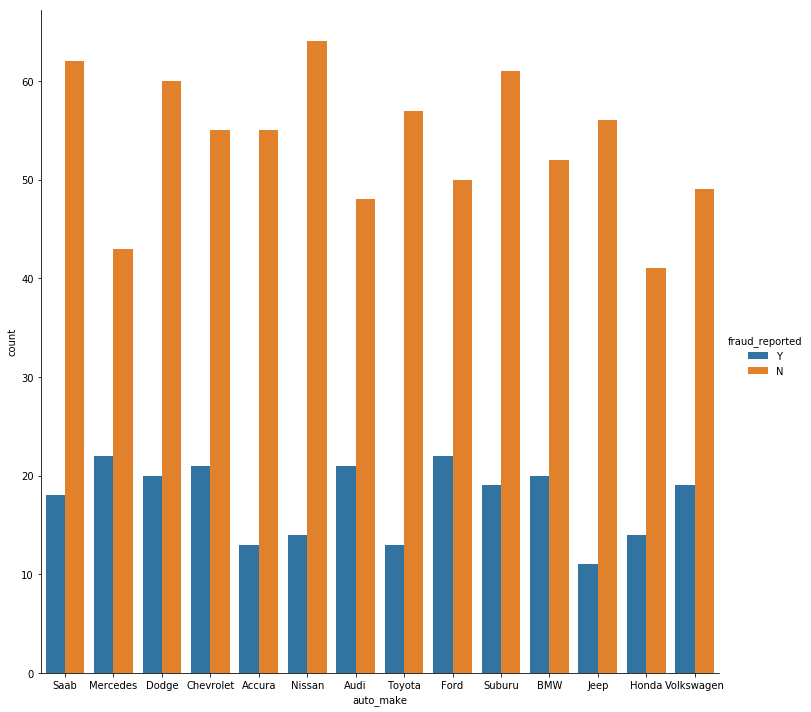

In [0]:
sns.factorplot('auto_make',data=axa,kind='count',hue='fraud_reported',size=10)

In [0]:
axa['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [0]:
axa['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


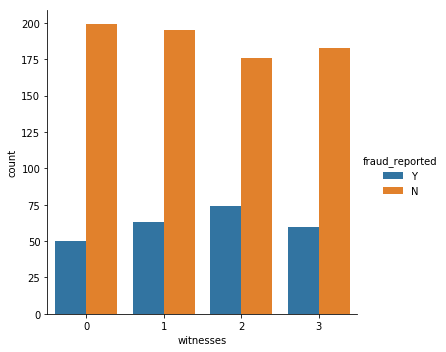

In [0]:
sns.factorplot('witnesses',data=axa,kind='count',hue='fraud_reported')

In [0]:
axa['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [0]:
axa['vehicle_age'] = 2015 - axa['auto_year']

In [0]:
axa['vehicle_age'].value_counts()

20    56
16    55
10    54
9     53
4     53
8     52
12    51
5     50
6     50
2     49
13    49
0     47
18    46
3     46
7     45
1     44
14    42
15    42
17    40
11    39
19    37
Name: vehicle_age, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


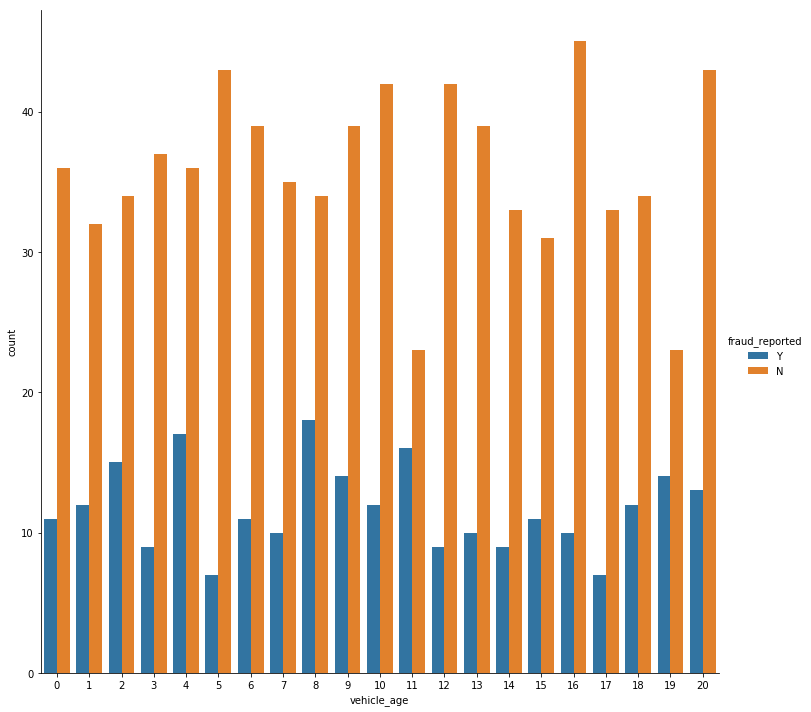

In [0]:
sns.factorplot('vehicle_age',data=axa,kind='count',hue='fraud_reported',size=10)

In [0]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]

names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']

axa['incident_period_of_day'] = pd.cut(axa.incident_hour_of_the_day, bins, labels=names).astype(object)

axa[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

 

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [0]:
axa['incident_period_of_day'].value_counts()

afternoon        231
past_midnight    165
night            131
early_morning    123
morning          119
fore-noon        116
evening          115
Name: incident_period_of_day, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


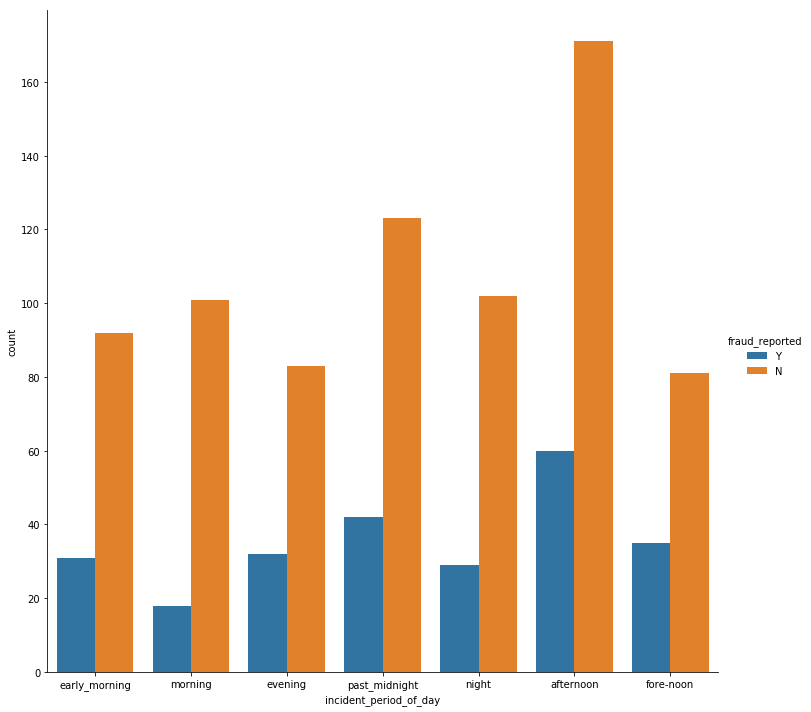

In [0]:
sns.factorplot('incident_period_of_day',data=axa,kind='count',hue='fraud_reported',size=10)

In [0]:
axa1 = axa.drop(columns = ['policy_number','day','insured_zip', 'policy_bind_date', 'policy_bind_date1','incident_date1','incident_date', 'incident_location', 'auto_year', 'incident_hour_of_the_day'])

In [0]:
axa1.drop(axa1[axa['collision_type'] == '?'].index, inplace = True) 

In [0]:
axa1.shape

(822, 37)

In [0]:
axa1['property_damage'].value_counts()

?      297
NO     273
YES    252
Name: property_damage, dtype: int64

In [0]:
x = {'YES': 1, 'NO': 0, '?': 2}

In [0]:
for col in axa1['property_damage']:
   axa1['property_damage_new'] = axa1['property_damage'].map(x)

In [0]:
axa1['property_damage_new'].value_counts()

2    297
0    273
1    252
Name: property_damage_new, dtype: int64

In [0]:
y = {'YES': 1, 'NO': 0, '?': 2}

In [0]:

for col in axa1['police_report_available']:
   axa1['police_report_available_new'] = axa1['police_report_available'].map(y)

In [0]:
axa1['police_report_available_new'].value_counts()

2    287
0    271
1    264
Name: police_report_available_new, dtype: int64

In [0]:
X= axa1.drop('fraud_reported',axis=1)
y = axa1['fraud_reported']

In [0]:
X.shape

(822, 38)

In [0]:
y.shape

(822,)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()



x = X.apply(LabelEncoder().fit_transform)

In [0]:
x.drop('police_report_available',axis = 1,inplace= True)
x.drop('property_damage',axis =1,inplace= True)

In [0]:
x.shape

(822, 36)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
le.fit(y)

y = le.transform(y)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [0]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [0]:
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, class_weight = 'balanced', max_features = 'auto')

 

rfcg = rfc.fit(x_train_scaled,y_train)

predictions = rfcg.predict(x_test_scaled)

 

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s


Baseline: N_features:  38
Baseline: Accuracy:  72.33
Baseline: Recall:  14.75

 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83       145
           1       0.64      0.15      0.24        61

    accuracy                           0.72       206
   macro avg       0.69      0.56      0.54       206
weighted avg       0.70      0.72      0.66       206



[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [0]:
def params(yt,yp):
  print('Accuracy:',accuracy_score(yt,yp))
  print('F1score:',f1_score(yt,yp))
  print('Prec:',precision_score(yt,yp))
  print('Recall',recall_score(yt,yp))
  print('ROC:',roc_auc_score(yt,yp))

In [0]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight='balanced',max_depth=4,n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred_rf=rfc.predict(x_test)
y_train_pred_rf=rfc.predict(x_train)

In [0]:
print('Test')
params(y_test,y_pred_rf)

Test
Accuracy: 0.7912621359223301
F1score: 0.6614173228346456
Prec: 0.6363636363636364
Recall 0.6885245901639344
ROC: 0.761503674392312


In [0]:
print('Train')
params(y_train,y_train_pred_rf)

Train
Accuracy: 0.8003246753246753
F1score: 0.6754617414248021
Prec: 0.6124401913875598
Recall 0.7529411764705882
ROC: 0.7856634133474019


In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       145
           1       0.64      0.69      0.66        61

    accuracy                           0.79       206
   macro avg       0.75      0.76      0.76       206
weighted avg       0.80      0.79      0.79       206



In [0]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print('Testing params')
params(y_test,y_pred)

Testing params
Accuracy: 0.7184466019417476
F1score: 0.5972222222222223
Prec: 0.5180722891566265
Recall 0.7049180327868853
ROC: 0.714527981910684


In [0]:
print('Training params')
params(y_train,y_train_pred)

Training params
Accuracy: 0.7288961038961039
F1score: 0.6107226107226107
Prec: 0.5057915057915058
Recall 0.7705882352941177
ROC: 0.7417963597995252


In [0]:
'''y1 = {'MALE': 1, 'FEMALE': 0}
for col in axa1['insured_sex']:
   axa1['insured_sex_new'] = axa1['insured_sex'].map(y1)
axa1['insured_sex_new'].value_counts()'''

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [0]:
'''y2 = {'OH': 1, 'IL': 0, 'IN':2}
for col in axa1['policy_state']:
   axa1['policy_state_new'] = axa1['policy_state'].map(y2)
axa1['policy_state_new'].value_counts()'''

1    352
0    338
2    310
Name: policy_state_new, dtype: int64

In [0]:
'''axa1['insured_education_level'].value_counts()'''

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [0]:
'''y3 = {'JD': 0, 'High School': 1, 'Associate':2,'MD':3,'Masters':4, 'PhD':5, 'College':6}
for col in axa1['insured_education_level']:
   axa1['insured_education_level_new'] = axa1['insured_education_level'].map(y3)
axa1['insured_education_level_new'].value_counts()'''

0    161
1    160
2    145
3    144
4    143
5    125
6    122
Name: insured_education_level_new, dtype: int64

In [0]:
'''axa1['insured_occupation'].value_counts()'''

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [0]:
'''y4 = {'machine-op-inspct': 0, 'prof-specialty': 1, 'tech-support':2,'exec-managerial':3,'sales':4, 'craft-repair':5, 'transport-moving':6,'priv-house-serv':7,'other-service':8,'armed-forces':9,'adm-clerical':10,'protective-serv':11,'handlers-cleaners':12}
for col in axa1['insured_occupation']:
   axa1['insured_occupation_new'] = axa1['insured_occupation'].map(y4)
axa1['insured_occupation_new'].value_counts()'''

0.0     93
1.0     85
2.0     78
3.0     76
4.0     76
5.0     74
6.0     72
7.0     71
8.0     71
9.0     69
10.0    65
11.0    63
12.0    54
Name: insured_occupation_new, dtype: int64

In [0]:
'''axa1['insured_hobbies'].value_counts()'''

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64